In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n') #tứ phân vị

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



Hãy tính phân vị thứ 9 trong thập phân vị(gọi là p9) cho M1 và M2
Gợi ý: Phân vị thứ 9 có tỉ lệ là 0.9

In [4]:
print(f'{df["M1"].quantile(0.9)}\n')

5.300000000000004



In [5]:
print(f'{df["M2"].quantile(0.9)}\n')

5.5



In [6]:
# Các đại lượng đo lường độ biến động(phân tán)

# Range
range = df['M1'].max() - df['M1'].min()

range

np.float64(6.0)

In [7]:
# IQR 
iqr = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

iqr

np.float64(2.25)

Hãy cho biết khoảng dao động của M2
Độ lớn của IQR của M2 là bao nhiêu
Khoảng giá trị của IQR của M2

In [8]:
range2 = df['M2'].max() - df['M2'].min()
range2

np.float64(6.5)

In [9]:
iqr2 = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

iqr2

np.float64(1.25)

In [10]:
# Độ lệch trung bình
# Từng phần tử - giá trị tb -> giá trị tuyệt đối -> lấy mean
deltaD = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))

deltaD

np.float64(1.1600000000000001)

In [11]:
# Bài tập
# Hãy tính range cho M1 và M2
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [12]:
# Hãy tính độ lớn khoảng IQR cho M1 và M2
df[['M1','M2']].quantile(0.75) - df[['M1','M2']].quantile(0.25)

M1    2.25
M2    1.25
dtype: float64

In [15]:
# Tính độ lệch trung bình cho M1 và M2
delta = np.mean(np.abs(df[['M1', 'M2']] - np.mean(df[['M1', 'M2']])))

delta

np.float64(0.9977000000000001)

In [20]:
# Phương sai
df['M1'].var()

np.float64(2.0289393939393943)

In [21]:
# Độ lệch chuẩn
df['M1'].std()

np.float64(1.424408436488423)

In [22]:
print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [24]:
# Phương pháp dùng Cofficient of Variance (CV) để
# mức độ biến động của 2 hay nhiều biến số
# Hãy so sánh mức độ biến động của M1 và M2
df[['M1','M2']].std()/df[['M1','M2']].mean() #CV

df['M1'].describe()


count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [25]:
df[['M1','M2','M3']].describe()


,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [16]:
# Sử dụng CV để ss mức độ phân tán của M1, M2, M3
# Hướng dẫn tính nhanh CV
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv) 

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

Bài tập: Sinh viên viết code để tìm ra giá trị cv lớn nhất và nhỏ nhất
Hãy sắp xếp tăng dần danh sách các giá trị CV

In [20]:
cv_sorted = cv.sort_values()
sorted(cv)

[0.2135664058628459, 0.2491311130540305, 0.3808578707188297]

In [21]:
max_cv = cv_sorted.max()
min_cv = cv_sorted.min()

In [22]:
max_cv_column = cv_sorted.idxmax()  # Tên cột có CV lớn nhất
min_cv_column = cv_sorted.idxmin()  # Tên cột có CV nhỏ nhất

In [26]:
# In ra kết quả
print("Danh sách CV theo thứ tự tăng dần:")
print(cv_sorted)

print(f"\nGiá trị CV lớn nhất: {max_cv:.2f} ở cột '{max_cv_column}'")
print(f"Giá trị CV nhỏ nhất: {min_cv:.2f} ở cột '{min_cv_column}'")

Danh sách CV theo thứ tự tăng dần:
M3    0.213566
M2    0.249131
M1    0.380858
dtype: float64

Giá trị CV lớn nhất: 0.38 ở cột 'M1'
Giá trị CV nhỏ nhất: 0.21 ở cột 'M3'


In [27]:
# Phân tích định lượng

df.groupby('GT')['M1'].describe()
# Câu hỏi: Đánh giá xem nhóm giới tính nào thi M1 tốt hơn

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [49]:
# tính CV cho M1 theo nhóm giới tính
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

In [48]:
df.head()

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [52]:
# Bài tập:
# Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ
# Lưu ý: Chỉ dùng 2 dòng code để thể hiện kết quả
df.groupby('GT')[['M1', 'M2', 'M3']].mean()


,M1,M2,M3
GT,,,
F,3.854167,4.046875,4.906250
M,3.634615,4.447115,4.846154


thi môn M2 tốt hơn so với nữ

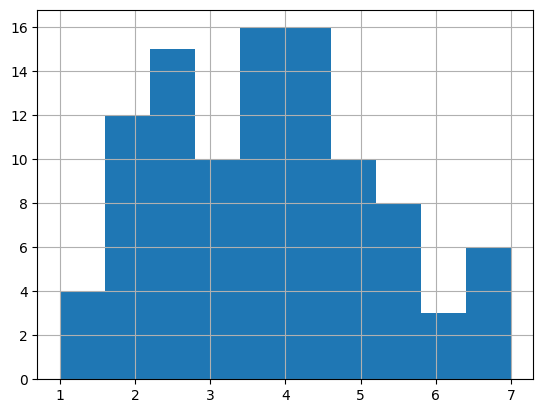

In [53]:
# Histogram
df['M1'].hist()
plt.show()

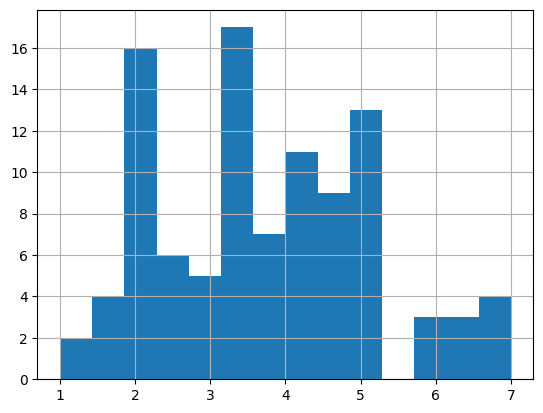

In [39]:
# Hướng dẫn về bins trong histogram
# Lưu ý: Khi chia bins càng nhỏ, khoản số lượng giá trị càng chính xác
# Các histogram khác nhau
df['M1'].hist(bins=14)
plt.show()

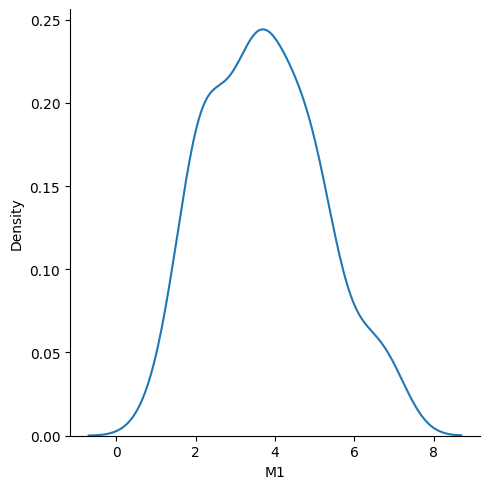

In [40]:
# Nâng cao hơn his, thì ta khám phá dạng phân phối xác xuất
# Làm mịn với phân phối xác xuất

sns.displot(df, x='M1', kind='kde')
plt.show()

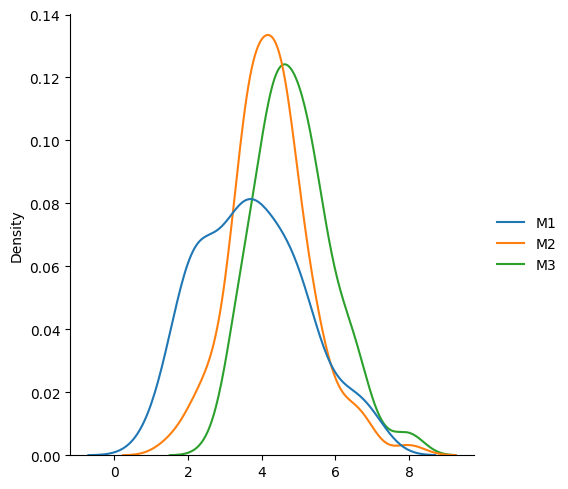

In [41]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

M1 gần với phân phối chuẩn hơn do 2 bên nó đều hơn, 2 M còn lại không gần như pp chuẩn 

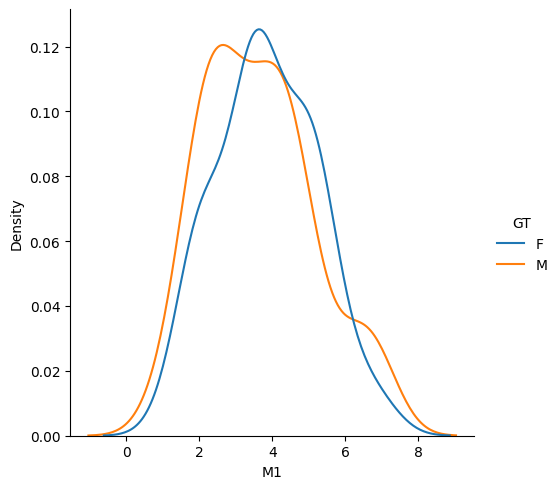

In [42]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

giới tính F gần giống pp chuẩn

In [43]:
# Skewness = độ xiên, độ lớn (trị tuyệt đối) chho biết mức độ dữ liệu
# lệch nhiều hay ít so với đường cong pp chuẩn
# Cho biết xác xuất được phân bổ lệch về phía nào nhiều

# Trị tuyệt đối giá trị càng lớn thì dl phân phối nghiêng càng nhiều(lệch)

# Diễn giải: Skewness > 0 -> mean ? median: ta gọi là Positive Skewness(lệch phải)

# Skewness < 0 -> mean < median: ta gọi là negative Skewness(lệch trái), 
# Skewness = 0 -> mean  median = mode: Phân phối không lệch còn được gọi là phân phối đối xứng

df['M1'].skew()

np.float64(0.33322084231625376)

In [44]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

Kurtosis (Pearson Kurtosis): độ nhọn, trị tuyệt đối cho biết mức

Giá trị cuat Kurtosis: Càng gần 3 thì fit
Dưới 3 thì fat
Trên 3 thì thin

Thông thường để đánh giá hình dạng độ nhọn ta dùng đại l

In [45]:
df[['M1']].kurtosis()

M1   -0.517004
dtype: float64

In [46]:
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

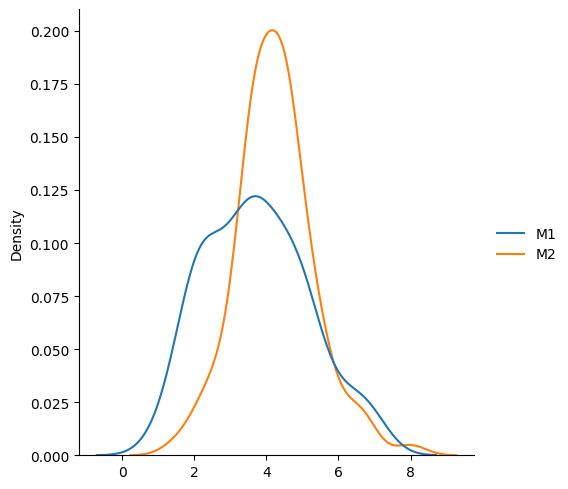

In [47]:
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()

M2 kurtosis lớn hơn M1

Đây là biểu đồ quan trọng trong việc phân tích dl địng lượng
Biểu đồ này cung cấp các thông tin quan trọng như
1. Q1: Từ phân vị 25%
2. Q2: Từ phân vị 50%(median)
3. Q3: Từ phân vị 75%
4. IQR: |Q3 - Q1|
5. Lower bound: Q1 - 1.5*IQR
6. Upper bound: Q3 + 1.5*IQR
7. Các ngoại biên, bất thường (outliner) cần xử lý trong dl

- Outliner: Là điểm dl khác biệt quá nhiều so với đa số dl
- Hướng dẫn:
    + Tính khoảng nghi ngờ chứa outliner
    + Tính khoảng chắc chắn chứa outliner

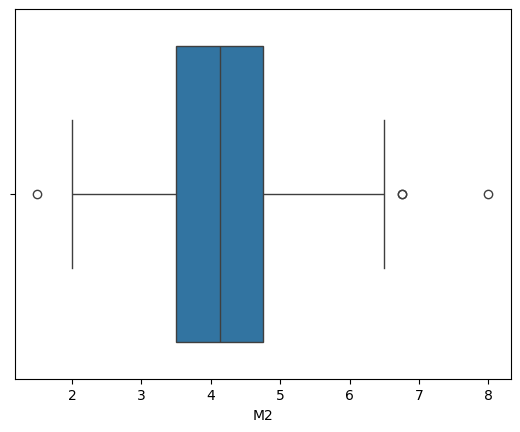

In [49]:
sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [ ]:
# Với điểm M2 hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

# Tự làm

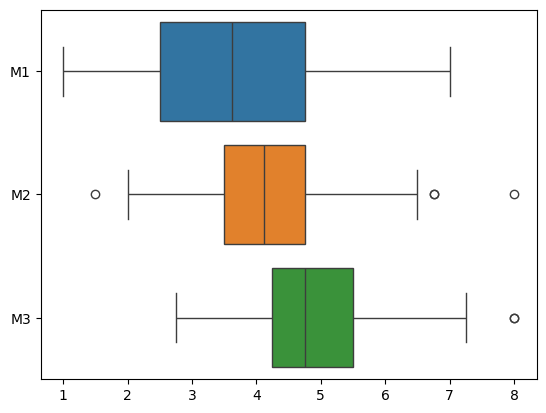

In [50]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

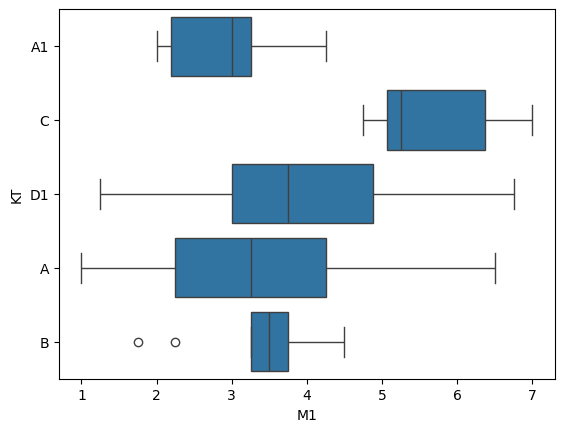

In [53]:
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

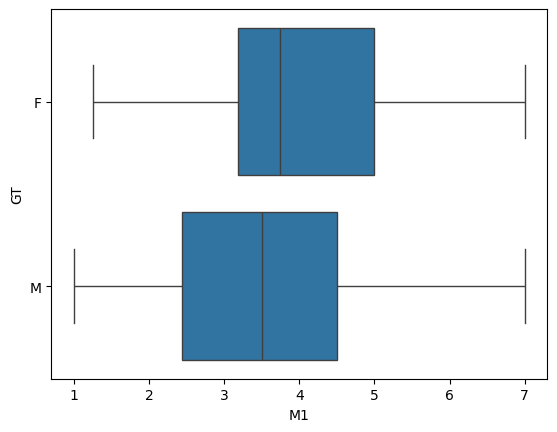

In [54]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()

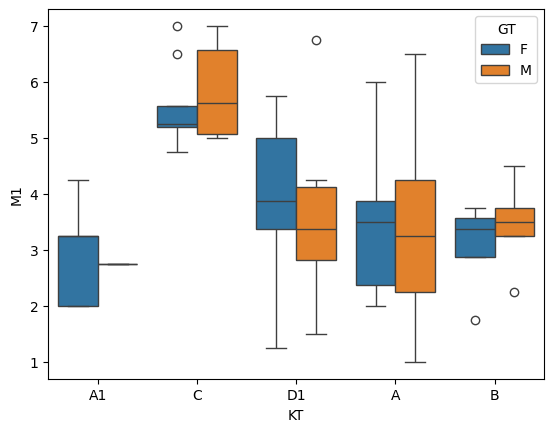

In [55]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

In [58]:
# Kiểm định bằng pp chuẩn
from scipy import stats


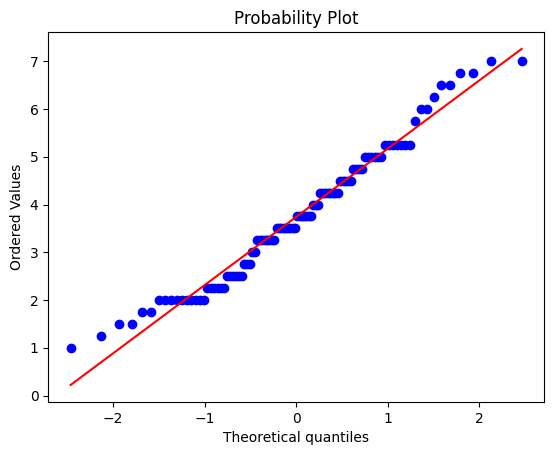

In [59]:
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

Phân tích sự tương quan(tác động, ảnh hưởng) qua lại giữa 2 bên biến định tính

PP1: Hiện phương sai: co-variance
- Giá trị co-variance > 0 thì 2 biến có tương quan thuận(đồng biến): 1 biến tăng thì biến kia cũng tăng, ngược lại
- Giá trị co-variance < 0 thì 2 biến có tương quan nghịch(nghịch biến): 1 tăng 1 giảm
- Giá trị co-variance = 0 thì 2 biến không tương quan: 1 tăng 1 không biết tăng hay giảm
-> Độ lớn(trị tuyệt đối của giá trị) càng lớn thì mức độ quan hệ(tương quan) càng chặt chẽ

In [60]:
# Ma trận phương sai: co-variance matrix
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [61]:
# So sánh sự tương quan(ảnh hưởng, tác động, liên hệ) giữa
# M1 so với M3 -> tương quan thuận
# M2 so với M3 -> tương quan nghịch
df[['M1','M2', 'M3']].cov()

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


Với pp ss tương quan bằng co-variance thì ta không đo lường được cường độ tương quan giữa 2 biến định lượng

Pearson Correlation: Tương quan tuyến tính
- r nằm trong khoảng [-1,1]
- r = 0 => không tương quan
- r < 0: tương quan nghịch
- r > 0: tương quan thuận
- |r| càng gần 1 thì tương quan càng cao
- |r| < 0.5: thì tương quan thấp
    [0.5; 0.65]: Khá
    [0.65; 0.75]: Tốt
    [0.75; 0.9]: rất tốt
    >0.9: hoàn hảo
    

In [62]:
# Ma trận tương quan: correlation matrix

# Lưu ý: được sử dụng khảo sát tương quan tuyến tính nhằm phân tích
# mối quan hệ tuyến tính giữa 2 biến định lượng
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


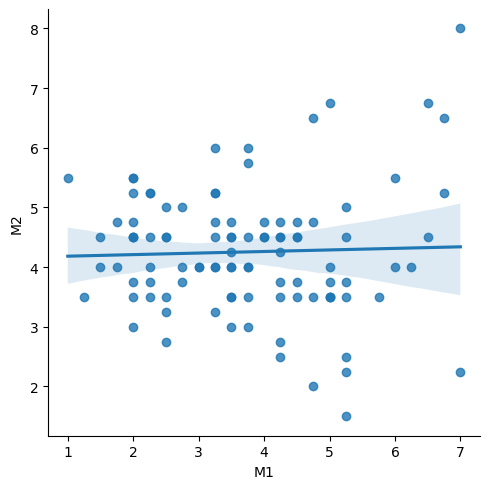

In [63]:
# Khám phá tương quan tuyến tính của 2 biến định lượng thông qua
# biểu đồ phân tán(Scatter)
# M2 = A*M1 + B

sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

nằm gần hoặc trên đường màu xanh: tương quan tốt
ngược lại: không tốt

In [ ]:
# Câu hỏi: Vẽ biểu đồ khám phá tương quan tuyến tính giữa M2 và M3


In [64]:
# Câu hỏi: Hãy sắp xếp mức độ tác động của M1 đến M2 và M3
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


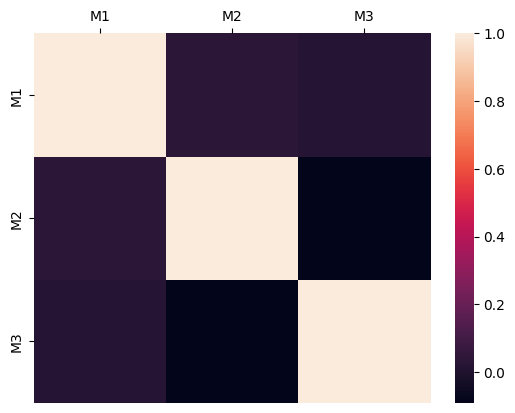

In [65]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

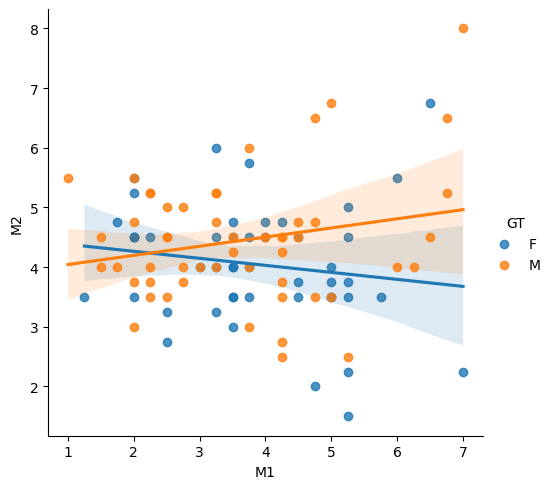

In [66]:
# Trực quan tương quan tuyến tính theo nhóm(định tính)
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

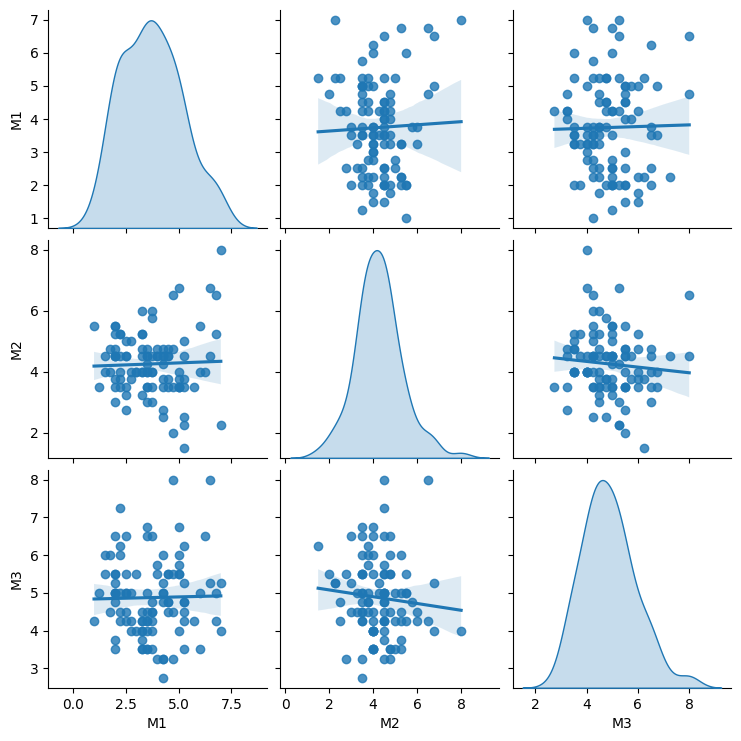

In [67]:
# Biểu đồ tổng hợp khám phá tổng hợp nhiều biến định lượng
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()